<a href="https://colab.research.google.com/github/jh9553-commits/The-relation-between-Chinese-Gold-Jewelry-Company-stock-prices-and-Gold-Future-prices/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading and Setup
This cell imports necessary libraries for data collection, analysis, and visualization.

In [ ]:
# Import necessary libraries for data collection, analysis, and visualization
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import jarque_bera
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import traceback

### Collect Research Data
This function collects historical price data for gold assets, Hong Kong and China jewelry companies, and the Hang Seng Index using the `yfinance` library. The data is stored in a dictionary and saved to CSV files.

In [ ]:
# Define a function to collect historical price data
def collect_research_data(start_date='2010-01-01', end_date='2025-10-13'):
    """Data collection following Research Methodology Section 5.1."""

    # Define assets and their tickers in a dictionary
    assets = {
        'gold_prices': {
            'COMEX_Gold_Futures': 'GC=F',
            'Gold_ETF_GLD': 'GLD',
            'Gold_ETF_IAU': 'IAU',
            'Silver_Futures': 'SI=F'
        },
        'hk_jewelry': {
            'Chow_Tai_Fook': '1929.HK',
            'Laopu_Gold': '6181.HK',
            'Luk_Fook_Holdings': '0590.HK',
            'Chow_Sang_Sang': '0116.HK'
        },
        'china_jewelry': {
            'China_National_Gold': '600916.SS'
        },
        'indices': {
            'Hang_Seng_Index': '^HSI'
        }
    }

    results = {}

    # Iterate through each category and ticker to download data
    for category, tickers in assets.items():
        print(f"\nCollecting {category.replace('_', ' ').title()} Data...")
        results[category] = {}

        for name, ticker in tickers.items():
            try:
                # Download data using yfinance
                df = yf.download(ticker, start=start_date, end=end_date, progress=False)
                if df.empty:
                    print(f"✗ Downloaded empty DataFrame for {name} ({ticker})")
                    continue

                # Flatten MultiIndex columns if necessary
                if isinstance(df.columns, pd.MultiIndex):
                    df.columns = [col[0] for col in df.columns]

                results[category][name] = df
                print(f"✓ Downloaded {name} ({ticker})")
                print(f"Columns: {df.columns.tolist()}")

            except Exception as e:
                # Handle errors during download
                print(f"✗ Error downloading {name} ({ticker}): {e}")

    return results


# Execute the data collection function
if __name__ == "__main__":
    print("RESEARCH DATA COLLECTION")
    research_data = collect_research_data()

    # Save the collected data to CSV files
    for category, data_dict in research_data.items():
        for asset_name, df in data_dict.items():
            if not df.empty:
                filename = f"{category}_{asset_name}.csv"
                df.to_csv(filename)
                print(f"Saved {filename}")

    print("Research data collection complete!")

RESEARCH DATA COLLECTION

✓ Downloaded COMEX_Gold_Futures (GC=F)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Gold_ETF_GLD (GLD)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Gold_ETF_IAU (IAU)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Silver_Futures (SI=F)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']



/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded Chow_Tai_Fook (1929.HK)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Laopu_Gold (6181.HK)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Luk_Fook_Holdings (0590.HK)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Chow_Sang_Sang (0116.HK)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']

✓ Downloaded China_National_Gold (600916.SS)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']



/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-3351567319.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded Hang_Seng_Index (^HSI)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
Saved gold_prices_COMEX_Gold_Futures.csv
Saved gold_prices_Gold_ETF_GLD.csv
Saved gold_prices_Gold_ETF_IAU.csv
Saved gold_prices_Silver_Futures.csv
Saved hk_jewelry_Chow_Tai_Fook.csv
Saved hk_jewelry_Laopu_Gold.csv
Saved hk_jewelry_Luk_Fook_Holdings.csv
Saved hk_jewelry_Chow_Sang_Sang.csv
Saved china_jewelry_China_National_Gold.csv
Saved indices_Hang_Seng_Index.csv
Research data collection complete!


### Calculate Returns and Perform Statistical Tests
This function calculates returns for all collected assets at daily, monthly, quarterly, and yearly frequencies. It also performs the Jarque-Bera test for normality on the returns.

In [ ]:
# Define a function to calculate returns and perform statistical tests
def calculate_returns_all_freq(data, freqs=['Daily', 'Monthly', 'Quarterly', 'Yearly']):
    """Calculate returns and perform statistical tests across all frequencies."""

    # Mapping for frequency codes
    fmap = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    all_results = {}

    # Iterate through each frequency
    for freq in freqs:
        print(f"\n{'='*80}")
        print(f"{freq} RETURNS ANALYSIS")
        print(f"{'='*80}")

        returns = {}

        # Iterate through each category and asset
        for category, data_dict in data.items():
            print(f"\n{category}:")
            returns[category] = {}

            for asset, df in data_dict.items():
                # Skip if DataFrame is empty or 'Close' column is missing
                if df.empty or 'Close' not in df.columns:
                    continue

                # Calculate returns based on frequency
                if freq == 'Daily':
                    rets = df['Close'].pct_change().dropna()
                else:
                    rets = df['Close'].resample(fmap[freq]).last().pct_change().dropna()

                # Skip if insufficient data for analysis
                if len(rets) < 3:
                    print(f"  {asset}: Insufficient data ({len(rets)} obs)")
                    continue

                returns[category][asset] = rets

                # Print return statistics
                print(f"\n  --- {asset} ---")
                print(f"  Stats: Mean={rets.mean():.4%}, Std={rets.std():.4%}, "
                      f"Min={rets.min():.4%}, Max={rets.max():.4%}")
                print(f"  Period: {rets.index[0].strftime('%Y-%m-%d')} to "
                      f"{rets.index[-1].strftime('%Y-%m-%d')} (N={len(rets)})")

                # Perform Jarque-Bera test for normality
                try:
                    jb = jarque_bera(rets)
                    print(f"  Jarque-Bera: Stat={jb.statistic:.4f}, p={jb.pvalue:.4f}, "
                          f"Skew={rets.skew():.4f}, Kurt={rets.kurt():.4f}")
                    print(f"  Normal? {'No (reject H0)' if jb.pvalue < 0.05 else 'Maybe (fail to reject H0)'}")
                except Exception as e:
                    print(f"  JB test error: {e}")

        all_results[freq] = returns

    return all_results


# Usage - runs analysis for all four frequencies
all_returns = calculate_returns_all_freq(research_data)


Daily RETURNS ANALYSIS

gold_prices:

  --- COMEX_Gold_Futures ---
  Stats: Mean=0.0372%, Std=1.0148%, Min=-9.3538%, Max=5.9477%
  Period: 2010-01-05 to 2025-10-10 (N=3966)
  Jarque-Bera: Stat=4257.4379, p=0.0000, Skew=-0.4564, Kurt=5.0009
  Normal? No (reject H0)

  --- Gold_ETF_GLD ---
  Stats: Mean=0.0354%, Std=0.9853%, Min=-8.7808%, Max=4.9038%
  Period: 2010-01-05 to 2025-10-10 (N=3967)
  Jarque-Bera: Stat=2885.9468, p=0.0000, Skew=-0.3670, Kurt=4.1203
  Normal? No (reject H0)

  --- Gold_ETF_IAU ---
  Stats: Mean=0.0360%, Std=0.9852%, Min=-8.8459%, Max=4.9505%
  Period: 2010-01-05 to 2025-10-10 (N=3967)
  Jarque-Bera: Stat=2922.1752, p=0.0000, Skew=-0.3707, Kurt=4.1455
  Normal? No (reject H0)

  --- Silver_Futures ---
  Stats: Mean=0.0436%, Std=1.9226%, Min=-17.7541%, Max=9.2862%
  Period: 2010-01-05 to 2025-10-10 (N=3966)
  Jarque-Bera: Stat=5086.1932, p=0.0000, Skew=-0.5595, Kurt=5.4423
  Normal? No (reject H0)

hk_jewelry:

  --- Chow_Tai_Fook ---
  Stats: Mean=0.0520%, Std=

/tmp/ipython-input-1829071825.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rets = df['Close'].resample(fmap[freq]).last().pct_change().dropna()
/tmp/ipython-input-1829071825.py:31: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  rets = df['Close'].resample(fmap[freq]).last().pct_change().dropna()
/tmp/ipython-input-1829071825.py:31: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rets = df['Close'].resample(fmap[freq]).last().pct_change().dropna()


### Correlation Analysis
This function calculates and visualizes the correlation matrix of returns for selected assets across different frequencies.


Daily (N=291):
                     COMEX_Gold_Futures  Gold_ETF_GLD  Gold_ETF_IAU  \
COMEX_Gold_Futures             1.000000      0.935844      0.935191   
Gold_ETF_GLD                   0.935844      1.000000      0.999634   
Gold_ETF_IAU                   0.935191      0.999634      1.000000   
Silver_Futures                 0.651141      0.614318      0.614860   
Chow_Tai_Fook                  0.226661      0.176798      0.172842   
Laopu_Gold                     0.154039      0.150471      0.147491   
Luk_Fook_Holdings              0.162193      0.104957      0.103574   
Chow_Sang_Sang                 0.098743      0.068794      0.067285   
China_National_Gold            0.161693      0.143835      0.142583   
Hang_Seng_Index                0.116504      0.124443      0.119498   

                     Silver_Futures  Chow_Tai_Fook  Laopu_Gold  \
COMEX_Gold_Futures         0.651141       0.226661    0.154039   
Gold_ETF_GLD               0.614318       0.176798    0.150471   
Gold

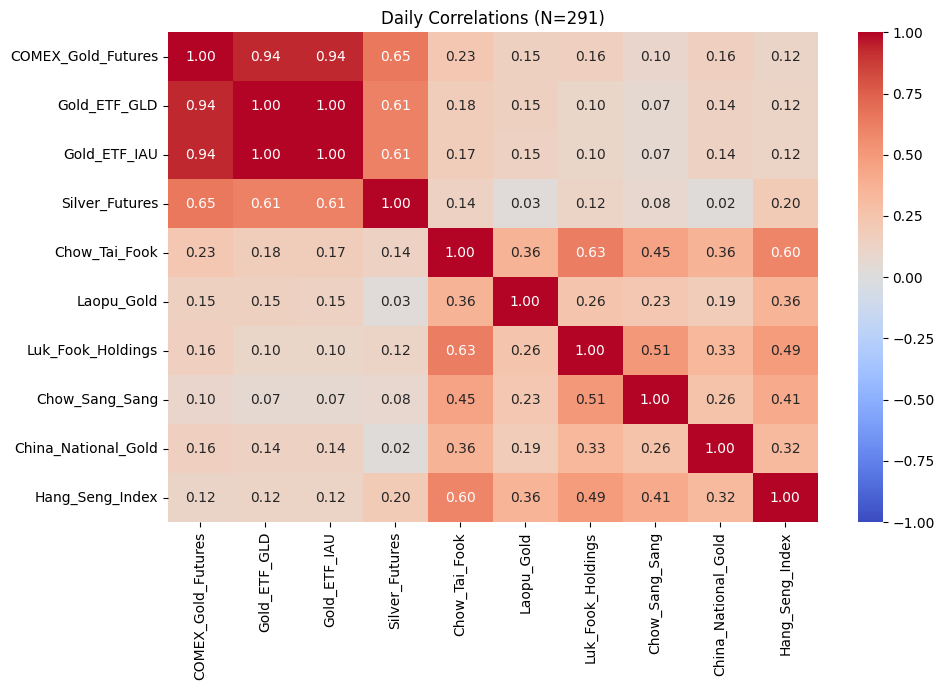

/tmp/ipython-input-15294634.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  p.resample(fmap[freq]).last().pct_change().dropna().rename(n)



Monthly (N=16):
                     COMEX_Gold_Futures  Gold_ETF_GLD  Gold_ETF_IAU  \
COMEX_Gold_Futures             1.000000      0.986785      0.986456   
Gold_ETF_GLD                   0.986785      1.000000      0.999950   
Gold_ETF_IAU                   0.986456      0.999950      1.000000   
Silver_Futures                 0.685164      0.677369      0.674748   
Chow_Tai_Fook                  0.301013      0.243475      0.241680   
Laopu_Gold                     0.362159      0.345839      0.343591   
Luk_Fook_Holdings              0.088584      0.026480      0.024775   
Chow_Sang_Sang                 0.186024      0.131501      0.129975   
China_National_Gold            0.174121      0.135407      0.135585   
Hang_Seng_Index                0.055733      0.063416      0.064830   

                     Silver_Futures  Chow_Tai_Fook  Laopu_Gold  \
COMEX_Gold_Futures         0.685164       0.301013    0.362159   
Gold_ETF_GLD               0.677369       0.243475    0.345839   
Gol

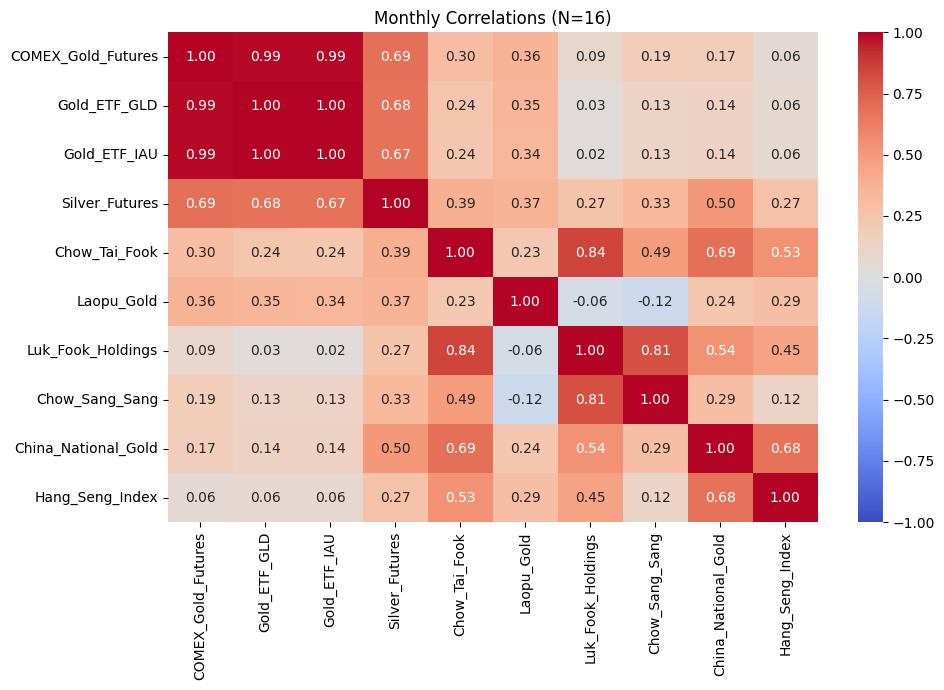

/tmp/ipython-input-15294634.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  p.resample(fmap[freq]).last().pct_change().dropna().rename(n)



Quarterly (N=6):
                     COMEX_Gold_Futures  Gold_ETF_GLD  Gold_ETF_IAU  \
COMEX_Gold_Futures             1.000000      0.999579      0.999638   
Gold_ETF_GLD                   0.999579      1.000000      0.999994   
Gold_ETF_IAU                   0.999638      0.999994      1.000000   
Silver_Futures                 0.892667      0.896492      0.896070   
Chow_Tai_Fook                  0.457667      0.473017      0.470255   
Laopu_Gold                     0.391568      0.389037      0.389189   
Luk_Fook_Holdings              0.415735      0.425373      0.423027   
Chow_Sang_Sang                 0.509939      0.513884      0.512603   
China_National_Gold            0.723465      0.737149      0.737007   
Hang_Seng_Index                0.899875      0.893042      0.893424   

                     Silver_Futures  Chow_Tai_Fook  Laopu_Gold  \
COMEX_Gold_Futures         0.892667       0.457667    0.391568   
Gold_ETF_GLD               0.896492       0.473017    0.389037   
Go

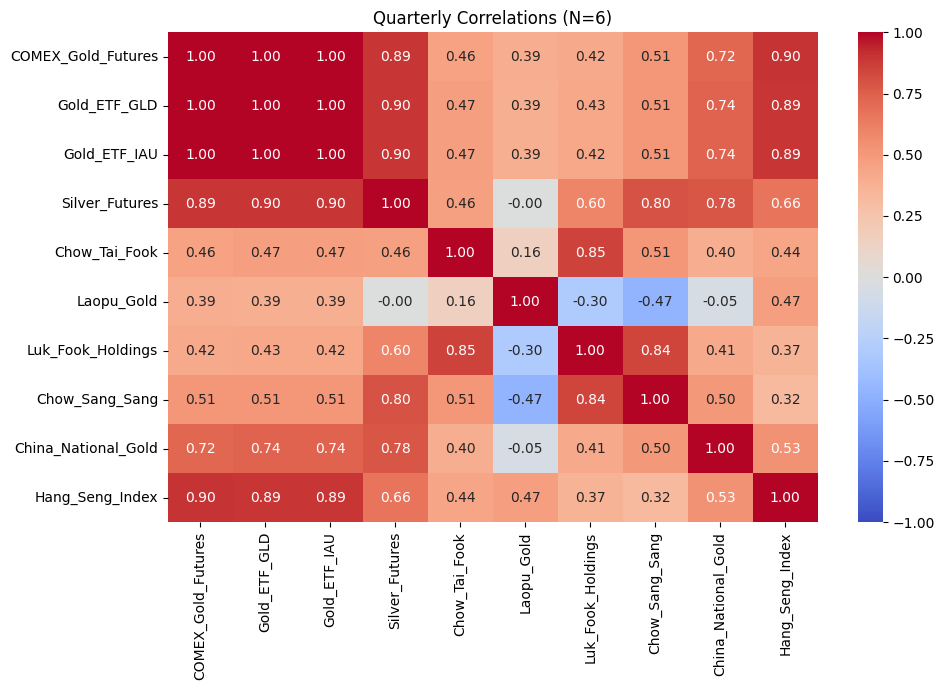

In [ ]:
# Define a function for correlation analysis across frequencies
def corr_all_freq(data, freqs=['Daily', 'Monthly', 'Quarterly']):
    """Streamlined correlation analysis from price data."""
    # Mapping for frequency codes
    fmap = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q'}
    results = {}

    # Iterate through each frequency
    for freq in freqs:
        try:
            # Get all asset closing price series
            prices = {n: d['Close'] for cat in data.values() for n, d in cat.items() if 'Close' in d.columns}

            # Calculate returns based on frequency
            rets = [p.pct_change().dropna().rename(n) if freq == 'Daily' else
                   p.resample(fmap[freq]).last().pct_change().dropna().rename(n)
                   for n, p in prices.items()]

            # Concatenate returns into a single DataFrame and drop NaNs
            df = pd.concat(rets, axis=1).dropna()

            # Skip correlation calculation if insufficient data
            if len(df) < 5:
                print(f"{freq}: Only {len(df)} obs - SKIP")
                continue

            # Calculate the correlation matrix
            corr = df.corr()
            results[freq] = corr
            print(f"\n{freq} (N={len(df)}):\n{corr}\n")

            # Visualize the correlation matrix using a heatmap
            plt.figure(figsize=(10, 7))
            sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0)
            plt.title(f'{freq} Correlations (N={len(df)})'), plt.tight_layout(), plt.show()

        except Exception as e:
            # Handle errors during correlation calculation or visualization
            print(f"{freq}: {e}")

    return results


# Usage - runs correlation analysis for specified frequencies using research_data
results = corr_all_freq(research_data)

### Create Gold Jewelry Index for China
This cell calculates a simple market capitalization-weighted index for selected Hong Kong jewelry companies to represent a "Gold Jewelry Index China". It uses adjusted closing prices and defined shares outstanding.

In [ ]:
# Define the shares outstanding for each company
shares_outstanding = {
    'Chow_Tai_Fook': 9.86e9,  # Approximately 9.86 Billion shares
    'Luk_Fook_Holdings': 587e6, # Approximately 587 Million shares
    'Chow_Sang_Sang': 675e6   # Approximately 675 Million shares (average of 670-677M)
}

# Get the adjusted closing prices for the relevant HK jewelry companies
hk_jewelry_close = pd.DataFrame({
    company: data_dict['Close'] for company, data_dict in research_data['hk_jewelry'].items()
    if company in shares_outstanding
})

# Drop rows with NaN values to ensure all constituents have data for the calculation period
hk_jewelry_close_cleaned = hk_jewelry_close.dropna()


# Calculate the market capitalization for each company over time
market_cap = hk_jewelry_close_cleaned.apply(lambda x: x * shares_outstanding[x.name])

# Calculate the sum of market capitalizations for the index constituents
total_market_cap = market_cap.sum(axis=1)

# The S&P 500 is a market-cap weighted index.
# We can create a simple index by normalizing the total market cap to a base value.
# Let's choose the first available date as the base date and set the index value to 100.

# Find the first date where all constituent stocks have data (after dropping NaNs)
index_start_date = total_market_cap.index.min() # Use the minimum index after dropping NaNs
base_value = 100

# Calculate the index value
# The divisor method is used for index calculation to handle corporate actions.
# However, for simplicity and illustration, we'll use a direct normalization approach here.
# A proper S&P-style index would require a dynamically adjusted divisor.

# Calculate the index value based on the change in total market cap relative to the base date
if index_start_date is not None:
    base_market_cap = total_market_cap.loc[index_start_date]
    gold_jewelry_index_china = (total_market_cap / base_market_cap) * base_value
else:
    gold_jewelry_index_china = pd.Series(dtype='float64')
    print("Could not determine a common start date for index calculation.")


# Add the new index to the research_data dictionary for consistency
# We'll create a new category or add it to an existing one.
# Let's create a new category 'calculated_indices'
if 'calculated_indices' not in research_data:
    research_data['calculated_indices'] = {}

# Store the index in a DataFrame with a 'Close' column for consistency with other dataframes
gold_jewelry_index_df = pd.DataFrame({'Close': gold_jewelry_index_china})
research_data['calculated_indices']['Gold_Jewelry_Index_China'] = gold_jewelry_index_df

# Print confirmation and display the head of the created index
print("Gold Jewelry Index China created and added to research_data.")
display(gold_jewelry_index_china.head())

Gold Jewelry Index China created and added to research_data.


,0
Date,
2011-12-15,100.000000
2011-12-16,102.490735
2011-12-19,100.921312
2011-12-20,100.110894
2011-12-21,100.732866


### Run Single Linear Regression Analysis
This function performs a single linear regression of the Gold Jewelry Index China returns against the COMEX Gold Futures returns across different time frequencies and visualizes the results.

/tmp/ipython-input-1165694241.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")



Daily Regression (β=0.1117, R²=0.0027)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.019
Date:                Thu, 23 Oct 2025   Prob (F-statistic):            0.00269
Time:                        23:30:08   Log-Likelihood:                 8076.2
No. Observations:                3312   AIC:                        -1.615e+04
Df Residuals:                    3310   BIC:                        -1.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

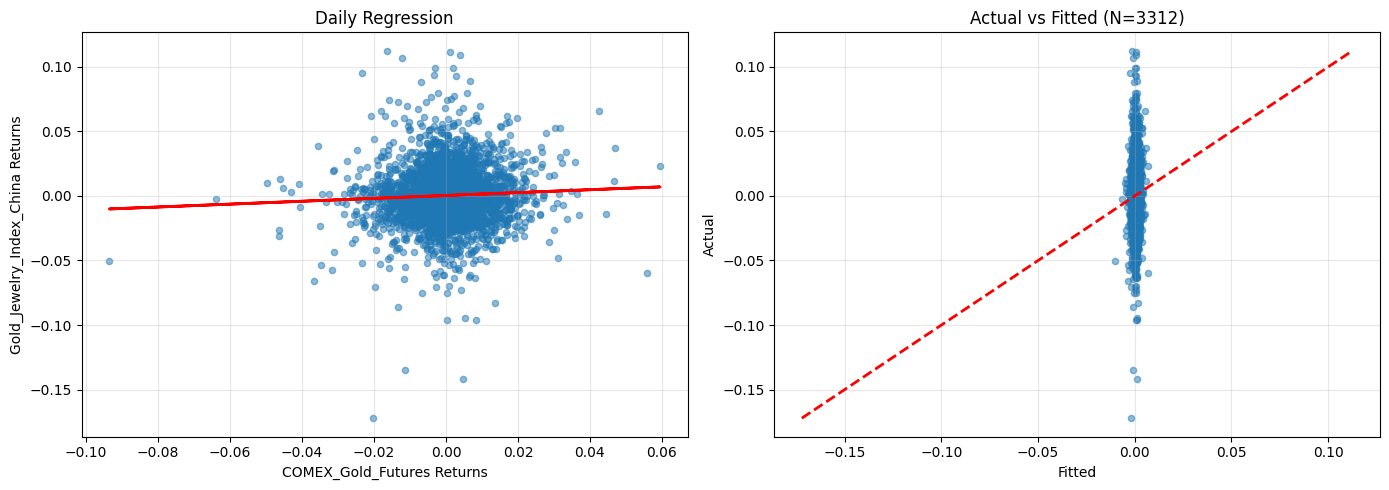

/tmp/ipython-input-1165694241.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-1165694241.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ind_ret = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-1165694241.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")



Monthly Regression (β=0.7695, R²=0.1138)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.06
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           8.82e-06
Time:                        23:30:08   Log-Likelihood:                 162.67
No. Observations:                 166   AIC:                            -321.3
Df Residuals:                     164   BIC:                            -315.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

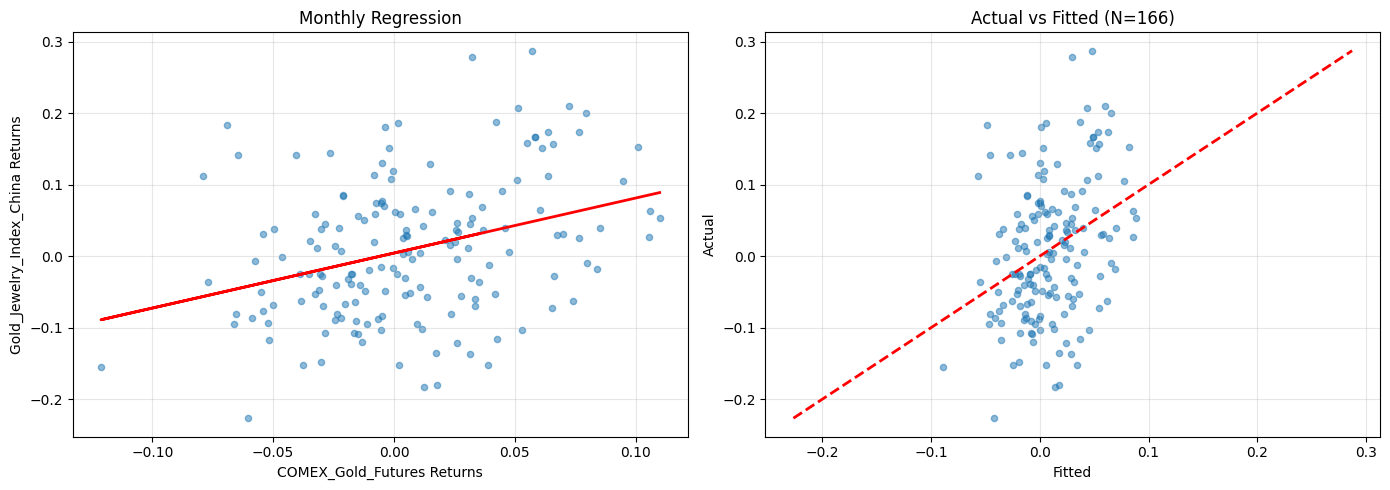

/tmp/ipython-input-1165694241.py:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-1165694241.py:19: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ind_ret = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-1165694241.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")



Quarterly Regression (β=0.8125, R²=0.1292)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     8.014
Date:                Thu, 23 Oct 2025   Prob (F-statistic):            0.00651
Time:                        23:30:09   Log-Likelihood:                 21.718
No. Observations:                  56   AIC:                            -39.44
Df Residuals:                      54   BIC:                            -35.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

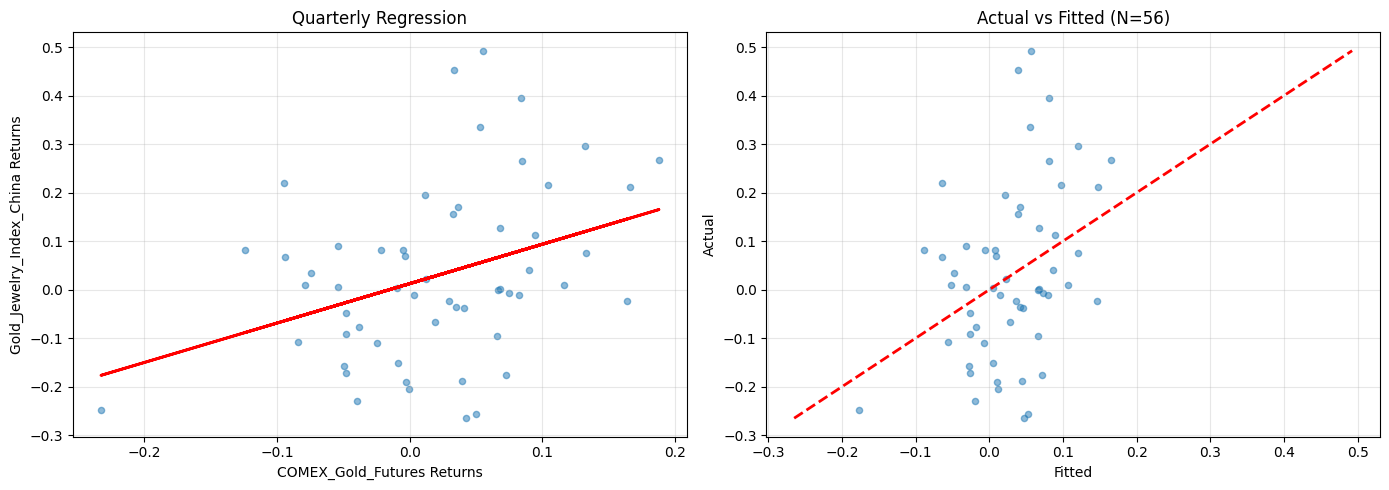

/tmp/ipython-input-1165694241.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-1165694241.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_ret = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-1165694241.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")



Yearly Regression (β=1.1812, R²=0.2909)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     4.923
Date:                Thu, 23 Oct 2025   Prob (F-statistic):             0.0465
Time:                        23:30:09   Log-Likelihood:                -4.7458
No. Observations:                  14   AIC:                             13.49
Df Residuals:                      12   BIC:                             14.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

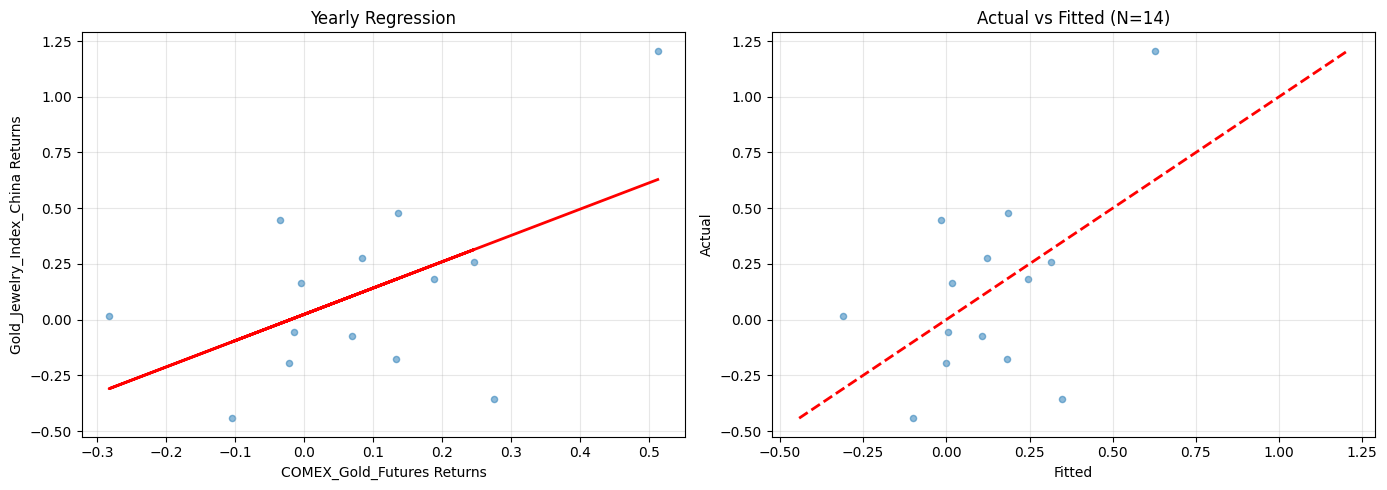

In [ ]:
# Define a function to run single linear regression analysis
def run_regression_analysis(research_data, all_returns, frequencies=['Daily', 'Monthly', 'Quarterly', 'Yearly'],
                            dep_var='Gold_Jewelry_Index_China', ind_var='COMEX_Gold_Futures'):
    """Run OLS regression across multiple time frequencies."""

    # Mapping for frequency codes
    freq_map = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    results = {}

    # Iterate through each frequency
    for freq in frequencies:
        try:
            # Get dependent variable returns (Gold Jewelry Index China)
            dep = research_data['calculated_indices'][dep_var]['Close']
            dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()

            # Get independent variable returns (COMEX Gold Futures)
            ind = research_data['gold_prices'][ind_var]['Close']
            ind_ret = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()

            # Concatenate dependent and independent returns and drop NaNs
            data = pd.concat([dep_ret, ind_ret], axis=1).dropna()
            # Define dependent variable (y) and independent variable (X) with a constant
            y, X = data.iloc[:, 0], sm.add_constant(data.iloc[:, 1])

            # Fit the OLS model
            model = sm.OLS(y, X).fit()
            results[freq] = model

            # Print regression summary
            print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")
            print(model.summary())

            # Plot actual vs fitted values
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
            ax1.scatter(data.iloc[:, 1], data.iloc[:, 0], alpha=0.5, s=20)
            ax1.plot(data.iloc[:, 1], model.fittedvalues, 'r-', lw=2)
            ax1.set_xlabel(f'{ind_var} Returns'), ax1.set_ylabel(f'{dep_var} Returns')
            ax1.set_title(f'{freq} Regression'), ax1.grid(True, alpha=0.3)

            ax2.scatter(model.fittedvalues, data.iloc[:, 0], alpha=0.5, s=20)
            lim = [min(model.fittedvalues.min(), data.iloc[:, 0].min()), max(model.fittedvalues.max(), data.iloc[:, 0].max())]
            ax2.plot(lim, lim, 'r--', lw=2)
            ax2.set_xlabel('Fitted'), ax2.set_ylabel('Actual')
            ax2.set_title(f'Actual vs Fitted (N={len(data)})'), ax2.grid(True, alpha=0.3)
            plt.tight_layout(), plt.show()

        except Exception as e:
            # Handle errors during regression or plotting
            print(f"Error in {freq}: {e}")

    return results


# Usage - runs regression for all four frequencies
results = run_regression_analysis(research_data, all_returns)

### Run Multiple Linear Regression Analysis
This function performs a multiple linear regression of the Gold Jewelry Index China returns against the COMEX Gold Futures and Hang Seng Index returns across different time frequencies and visualizes the actual vs fitted values.


Daily Regression (R²=0.2661, N=3308)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     599.2
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          9.21e-223
Time:                        23:30:10   Log-Likelihood:                 8571.6
No. Observations:                3308   AIC:                        -1.714e+04
Df Residuals:                    3305   BIC:                        -1.712e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

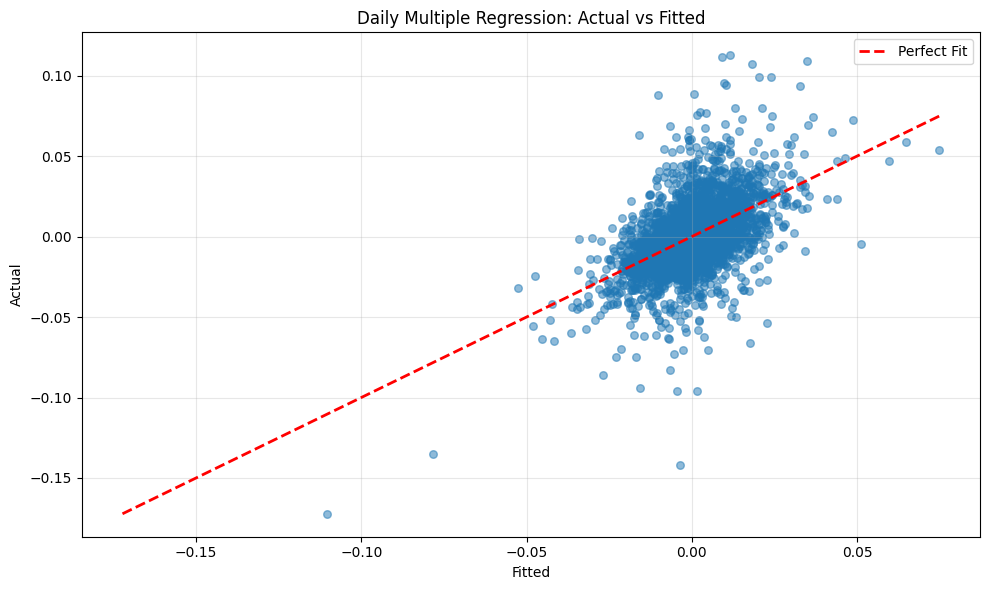

/tmp/ipython-input-3742447988.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3742447988.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3742447988.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()



Monthly Regression (R²=0.3006, N=166)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     35.03
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           2.21e-13
Time:                        23:30:10   Log-Likelihood:                 182.33
No. Observations:                 166   AIC:                            -358.7
Df Residuals:                     163   BIC:                            -349.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

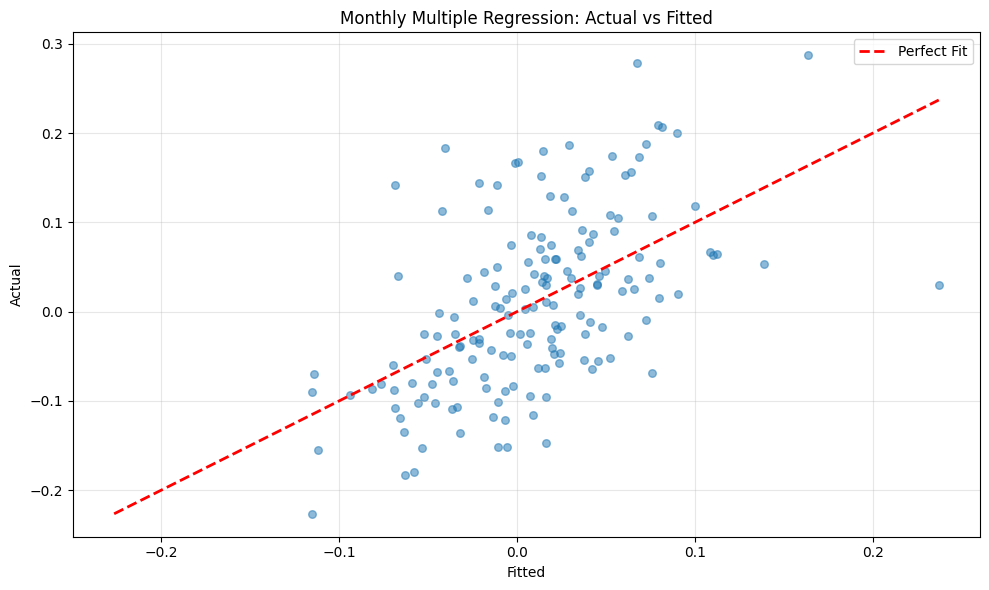

/tmp/ipython-input-3742447988.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3742447988.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3742447988.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()



Quarterly Regression (R²=0.2526, N=56)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     8.954
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           0.000447
Time:                        23:30:11   Log-Likelihood:                 25.994
No. Observations:                  56   AIC:                            -45.99
Df Residuals:                      53   BIC:                            -39.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

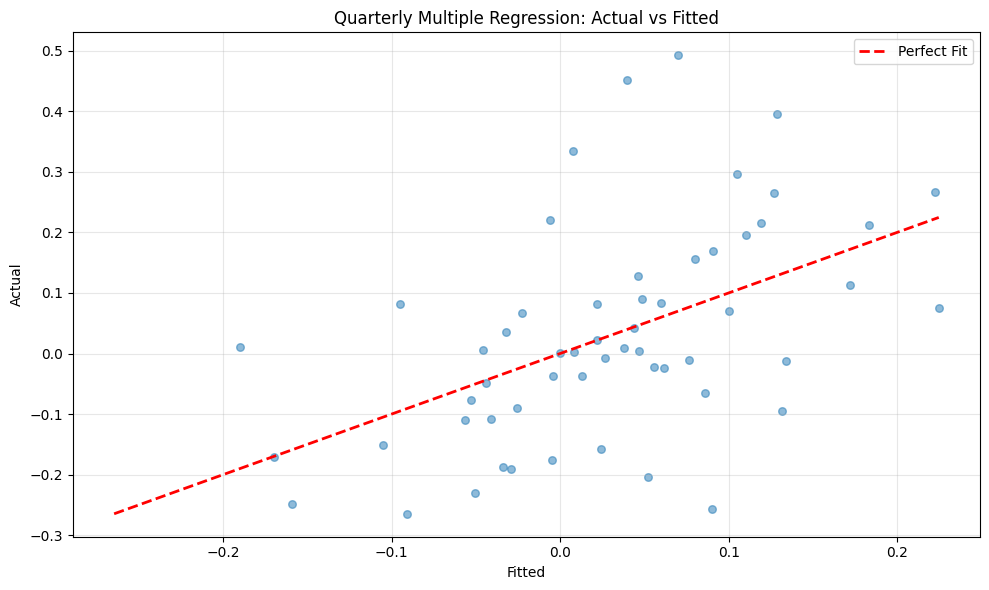

/tmp/ipython-input-3742447988.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3742447988.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3742447988.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()



Yearly Regression (R²=0.3205, N=14)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     2.594
Date:                Thu, 23 Oct 2025   Prob (F-statistic):              0.119
Time:                        23:30:11   Log-Likelihood:                -4.4475
No. Observations:                  14   AIC:                             14.90
Df Residuals:                      11   BIC:                             16.81
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

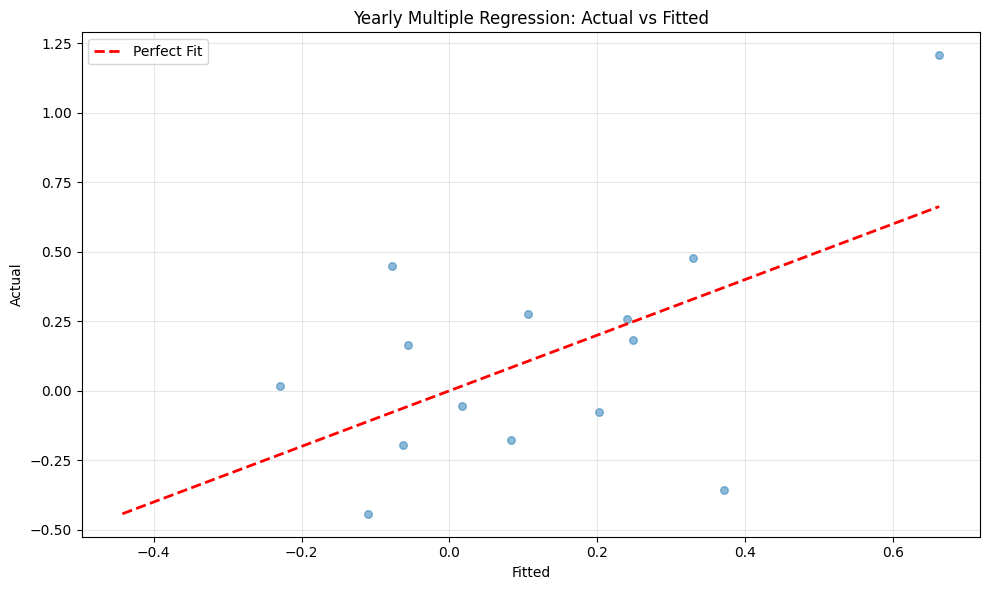

In [ ]:
# Define a function to run multiple linear regression analysis
def run_multiple_regression_all_freq(data, frequencies=['Daily', 'Monthly', 'Quarterly', 'Yearly'],
                                     dep_var='Gold_Jewelry_Index_China', ind_vars=['COMEX_Gold_Futures', 'Hang_Seng_Index']):
    """Run multiple regression across all frequencies."""

    # Mapping for frequency codes and variable locations in research_data
    freq_map = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    var_map = {'COMEX_Gold_Futures': ('gold_prices', 'Close'), 'Hang_Seng_Index': ('indices', 'Close')}
    results = {}

    # Iterate through each frequency
    for freq in frequencies:
        try:
            # Get dependent variable returns (Gold Jewelry Index China)
            dep = data['calculated_indices'][dep_var]['Close']
            dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()

            # Get independent variables returns
            ind_data = pd.DataFrame()
            for var in ind_vars:
                if var not in var_map:
                    continue
                cat, col = var_map[var]
                ind = data[cat][var][col]
                ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()

            # Align dependent and independent returns and drop NaNs
            reg_data = pd.concat([dep_ret, ind_data], axis=1).dropna()

            # Skip regression if insufficient data
            if len(reg_data) < len(ind_vars) + 2:
                print(f"{freq}: Not enough data ({len(reg_data)} obs)")
                continue

            # Define dependent variable (y) and independent variables (X) with a constant
            y, X = reg_data.iloc[:, 0], sm.add_constant(reg_data.iloc[:, 1:])
            # Fit the OLS model
            model = sm.OLS(y, X).fit()
            results[freq] = model

            # Print regression summary
            print(f"\n{'='*60}\n{freq} Regression (R²={model.rsquared:.4f}, N={len(reg_data)})\n{'='*60}")
            print(model.summary())

            # Plot actual vs fitted values
            plt.figure(figsize=(10, 6))
            plt.scatter(model.fittedvalues, y, alpha=0.5, s=30)
            lim = [min(model.fittedvalues.min(), y.min()), max(model.fittedvalues.max(), y.min())]
            plt.plot(lim, lim, 'r--', lw=2, label='Perfect Fit')
            plt.xlabel('Fitted'), plt.ylabel('Actual')
            plt.title(f'{freq} Multiple Regression: Actual vs Fitted'), plt.legend(), plt.grid(True, alpha=0.3)
            plt.tight_layout(), plt.show()

        except Exception as e:
            # Handle errors during regression or plotting
            print(f"Error in {freq}: {e}")

    return results


# Usage: run multiple regression with Gold Index China as dependent and COMEX and HSI as independent variables
results = run_multiple_regression_all_freq(research_data,
                                           ind_vars=['COMEX_Gold_Futures', 'Hang_Seng_Index'])

### Correlation Analysis (Selected Assets)
This function calculates and visualizes the correlation matrix specifically for the Gold Jewelry Index China, COMEX Gold Futures, and Hang Seng Index returns across different frequencies.


Daily (N=3308):
            Gold_Index     COMEX       HSI
Gold_Index    1.000000  0.052155  0.515028
COMEX         0.052155  1.000000  0.044815
HSI           0.515028  0.044815  1.000000



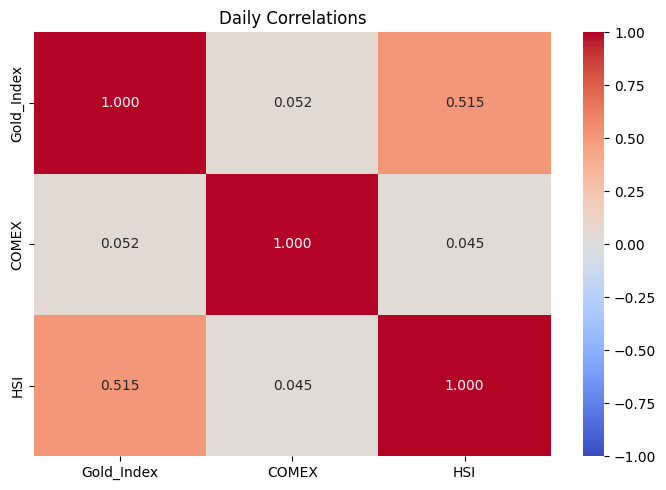

/tmp/ipython-input-1673292381.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Gold_Index': gold_idx.resample(rf).last().pct_change(),
/tmp/ipython-input-1673292381.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'COMEX': comex.resample(rf).last().pct_change(),
/tmp/ipython-input-1673292381.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'HSI': hsi.resample(rf).last().pct_change()



Monthly (N=166):
            Gold_Index     COMEX       HSI
Gold_Index    1.000000  0.337321  0.503438
COMEX         0.337321  1.000000  0.252579
HSI           0.503438  0.252579  1.000000



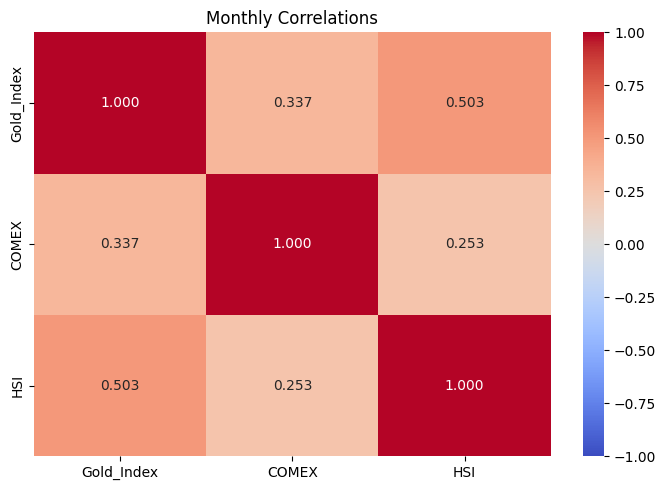

/tmp/ipython-input-1673292381.py:27: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'Gold_Index': gold_idx.resample(rf).last().pct_change(),
/tmp/ipython-input-1673292381.py:28: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'COMEX': comex.resample(rf).last().pct_change(),
/tmp/ipython-input-1673292381.py:29: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'HSI': hsi.resample(rf).last().pct_change()



Quarterly (N=56):
            Gold_Index     COMEX       HSI
Gold_Index    1.000000  0.359489  0.455430
COMEX         0.359489  1.000000  0.352835
HSI           0.455430  0.352835  1.000000



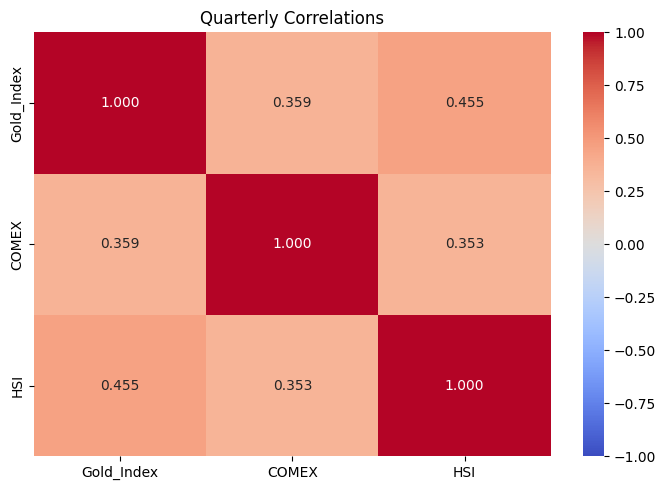

/tmp/ipython-input-1673292381.py:27: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'Gold_Index': gold_idx.resample(rf).last().pct_change(),
/tmp/ipython-input-1673292381.py:28: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'COMEX': comex.resample(rf).last().pct_change(),
/tmp/ipython-input-1673292381.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'HSI': hsi.resample(rf).last().pct_change()



Yearly (N=14):
            Gold_Index     COMEX       HSI
Gold_Index    1.000000  0.539352  0.430249
COMEX         0.539352  1.000000  0.526623
HSI           0.430249  0.526623  1.000000



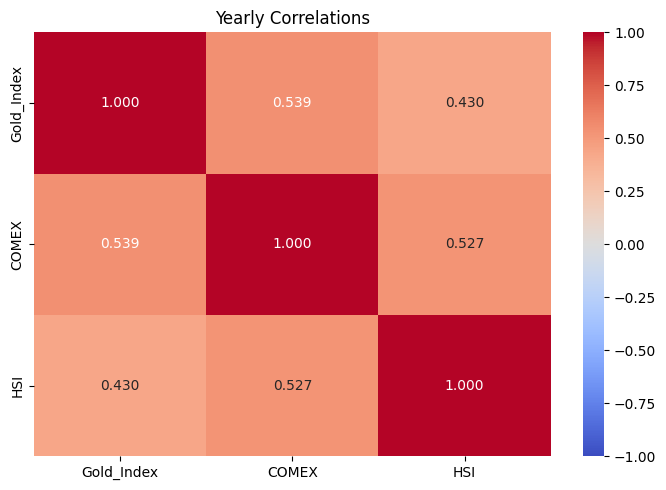

In [ ]:
# Define a function for correlation analysis of selected assets
def correlation_analysis(data, frequencies=['Daily', 'Monthly', 'Quarterly', 'Yearly']):
    """Quick correlation analysis across frequencies."""

    # Mapping for frequency codes
    freq_map = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    results = {}

    # Iterate through each frequency
    for freq in frequencies:
        try:
            # Get closing prices for selected assets
            gold_idx = data['calculated_indices']['Gold_Jewelry_Index_China']['Close']
            comex = data['gold_prices']['COMEX_Gold_Futures']['Close']
            hsi = data['indices']['Hang_Seng_Index']['Close']

            # Calculate returns based on frequency and combine into a DataFrame
            if freq == 'Daily':
                returns = pd.DataFrame({
                    'Gold_Index': gold_idx.pct_change(),
                    'COMEX': comex.pct_change(),
                    'HSI': hsi.pct_change()
                }).dropna()
            else:
                rf = freq_map[freq]
                returns = pd.DataFrame({
                    'Gold_Index': gold_idx.resample(rf).last().pct_change(),
                    'COMEX': comex.resample(rf).last().pct_change(),
                    'HSI': hsi.resample(rf).last().pct_change()
                }).dropna()

            # Calculate the correlation matrix
            corr = returns.corr()
            results[freq] = corr

            # Print the correlation matrix
            print(f"\n{freq} (N={len(returns)}):\n{corr}\n")

            # Visualize the correlation matrix using a heatmap
            plt.figure(figsize=(7, 5))
            sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1, center=0)
            plt.title(f'{freq} Correlations'), plt.tight_layout(), plt.show()

        except Exception as e:
            # Handle errors during correlation calculation or visualization
            print(f"{freq} error: {e}")

    return results


# Usage: run correlation analysis for Gold Index China, COMEX Gold Futures, and Hang Seng Index
corr_results = correlation_analysis(research_data)

### Non-linear Regression Analysis
This function performs non-linear regression analysis of the Gold Jewelry Index China returns against COMEX Gold Futures and Hang Seng Index returns, including squared and interaction terms. It also conducts an F-test to compare the linear and non-linear models and visualizes the non-linear fits.


Daily Non-Linear Regression Analysis
                            OLS Regression Results                            
Dep. Variable:             Gold_Index   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     244.2
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          1.76e-222
Time:                        23:30:13   Log-Likelihood:                 8580.3
No. Observations:                3308   AIC:                        -1.715e+04
Df Residuals:                    3302   BIC:                        -1.711e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

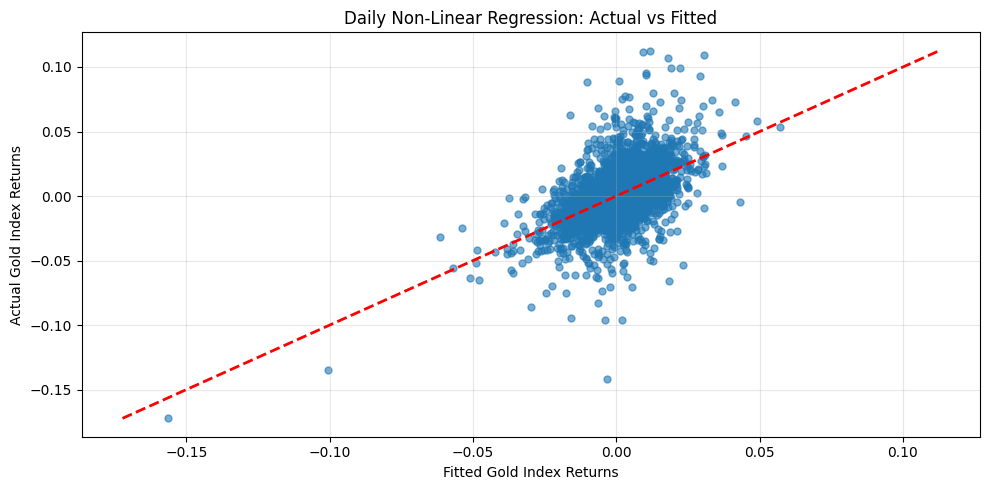

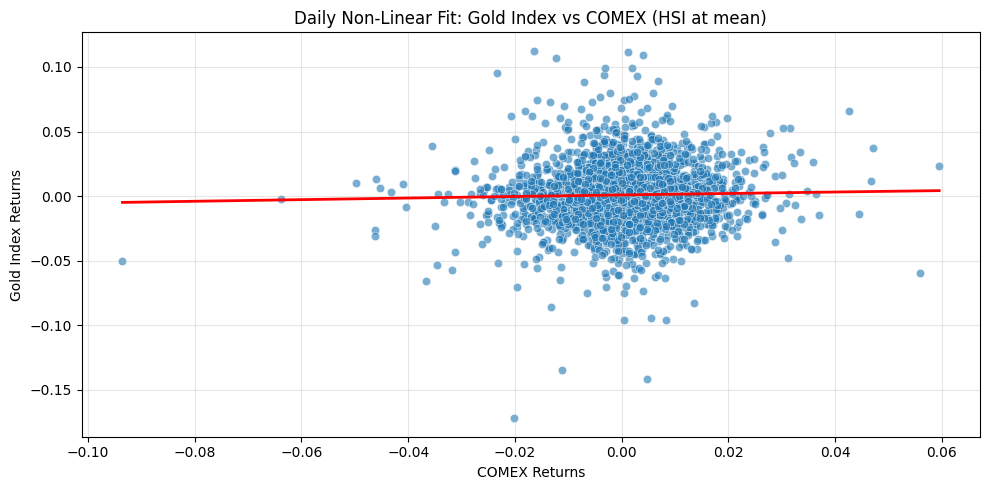

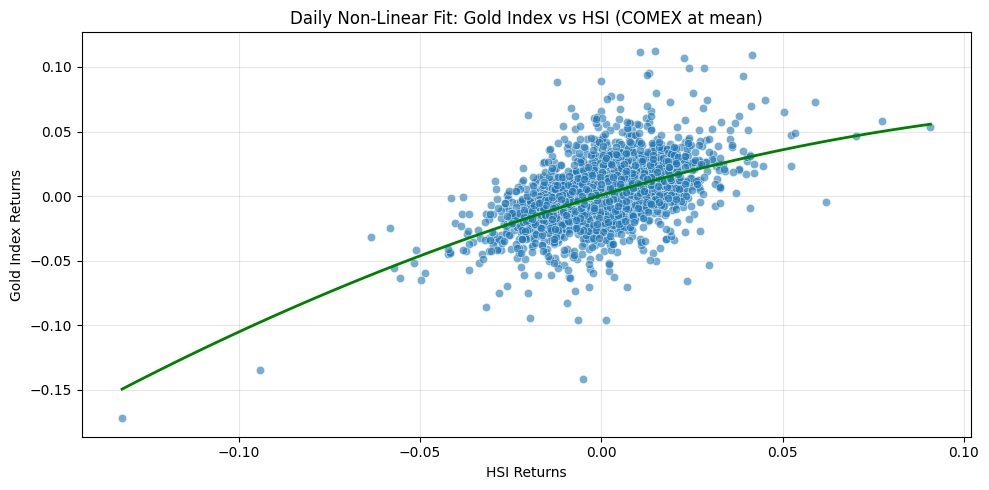


Monthly Non-Linear Regression Analysis
                            OLS Regression Results                            
Dep. Variable:             Gold_Index   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     16.41
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           4.66e-13
Time:                        23:30:15   Log-Likelihood:                 187.01
No. Observations:                 166   AIC:                            -362.0
Df Residuals:                     160   BIC:                            -343.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

/tmp/ipython-input-138341848.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Gold_Index': gold_idx.resample(fcode).last().pct_change(),
/tmp/ipython-input-138341848.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'COMEX': comex.resample(fcode).last().pct_change(),
/tmp/ipython-input-138341848.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'HSI': hsi.resample(fcode).last().pct_change()


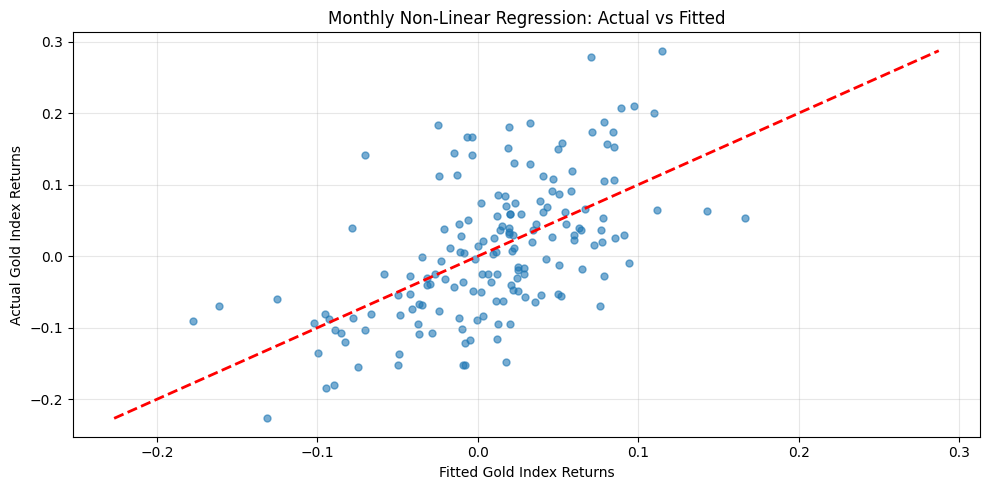

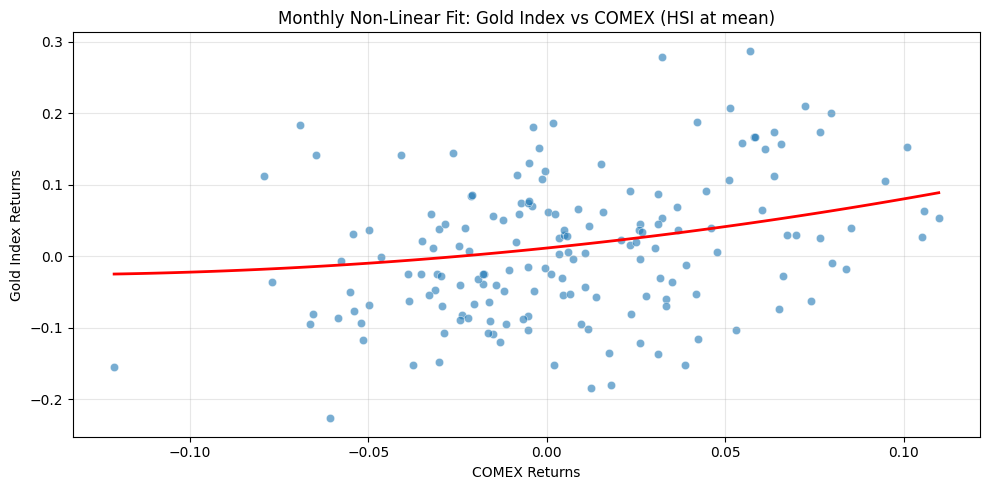

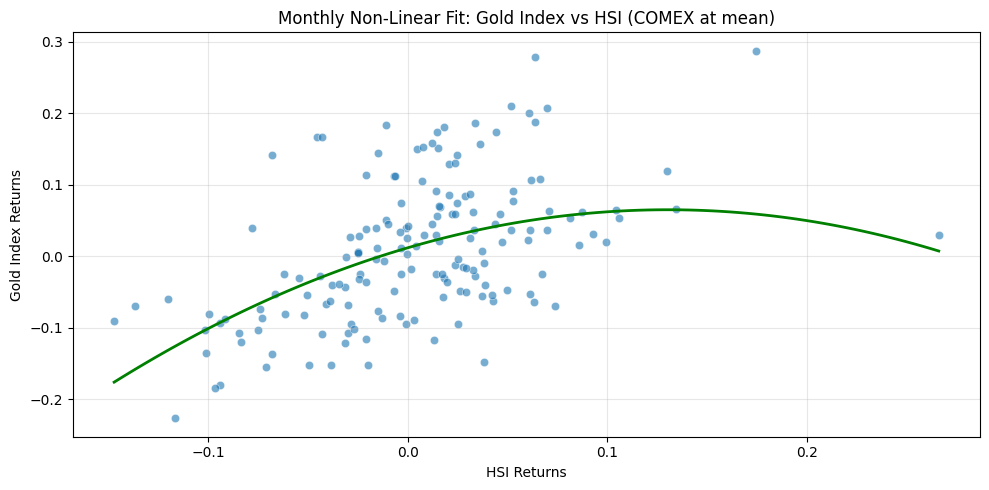


Quarterly Non-Linear Regression Analysis
                            OLS Regression Results                            
Dep. Variable:             Gold_Index   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.009
Date:                Thu, 23 Oct 2025   Prob (F-statistic):            0.00390
Time:                        23:30:16   Log-Likelihood:                 27.283
No. Observations:                  56   AIC:                            -42.57
Df Residuals:                      50   BIC:                            -30.41
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const   

/tmp/ipython-input-138341848.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'Gold_Index': gold_idx.resample(fcode).last().pct_change(),
/tmp/ipython-input-138341848.py:27: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'COMEX': comex.resample(fcode).last().pct_change(),
/tmp/ipython-input-138341848.py:28: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'HSI': hsi.resample(fcode).last().pct_change()


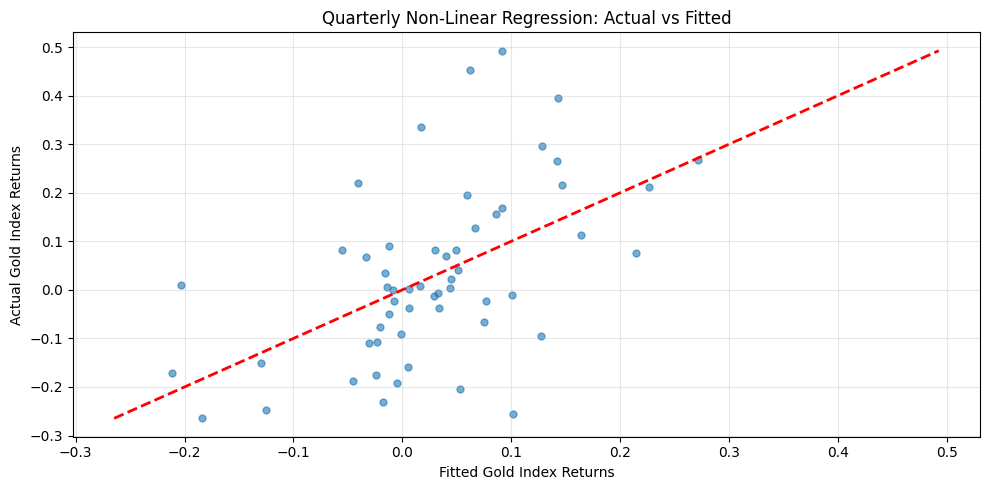

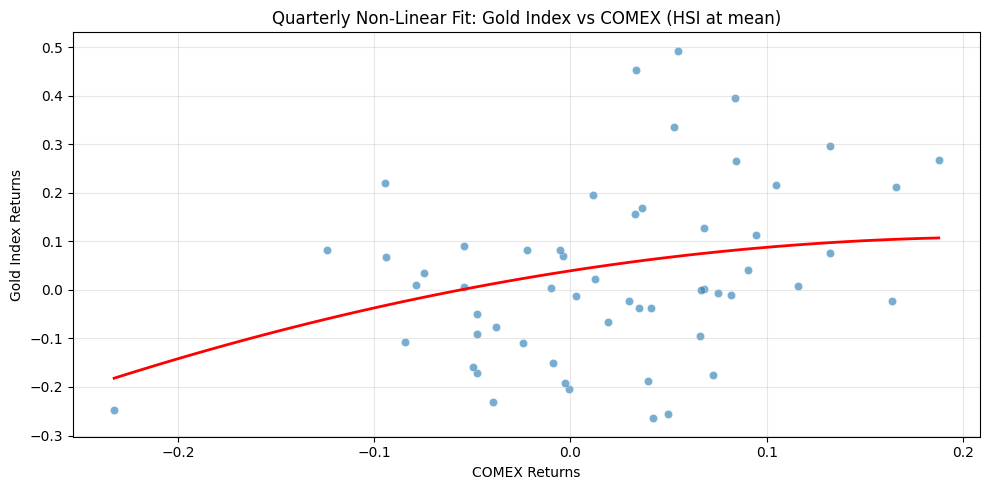

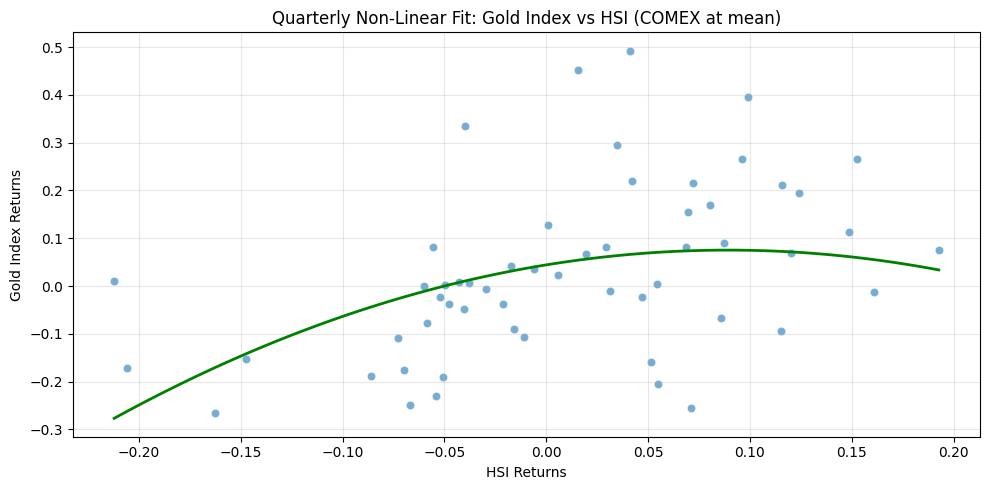


Yearly Non-Linear Regression Analysis
                            OLS Regression Results                            
Dep. Variable:             Gold_Index   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2.006
Date:                Thu, 23 Oct 2025   Prob (F-statistic):              0.182
Time:                        23:30:17   Log-Likelihood:                -1.4642
No. Observations:                  14   AIC:                             14.93
Df Residuals:                       8   BIC:                             18.76
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const      

/tmp/ipython-input-138341848.py:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'Gold_Index': gold_idx.resample(fcode).last().pct_change(),
/tmp/ipython-input-138341848.py:27: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'COMEX': comex.resample(fcode).last().pct_change(),
/tmp/ipython-input-138341848.py:28: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'HSI': hsi.resample(fcode).last().pct_change()


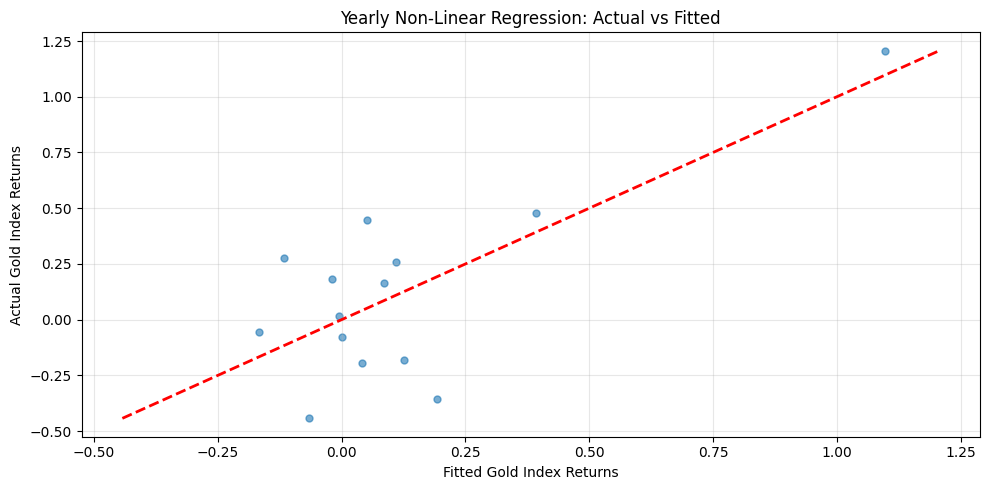

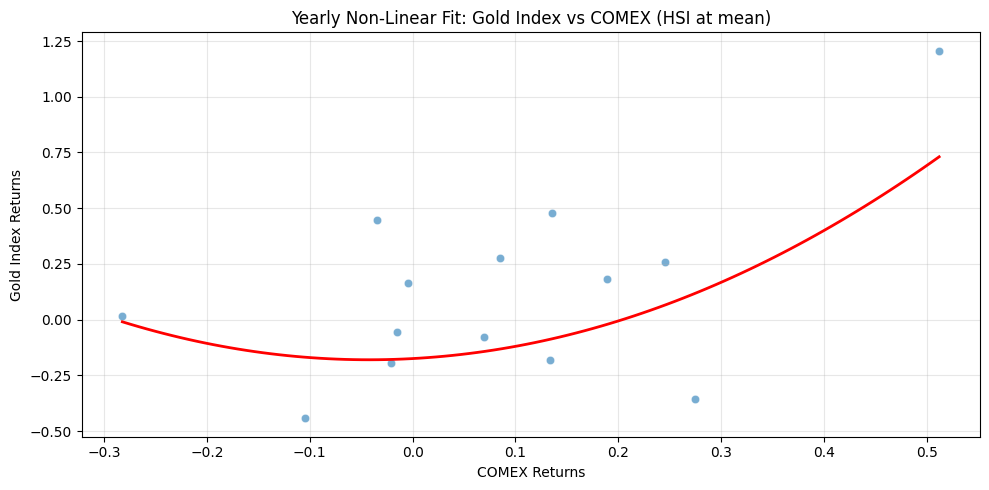

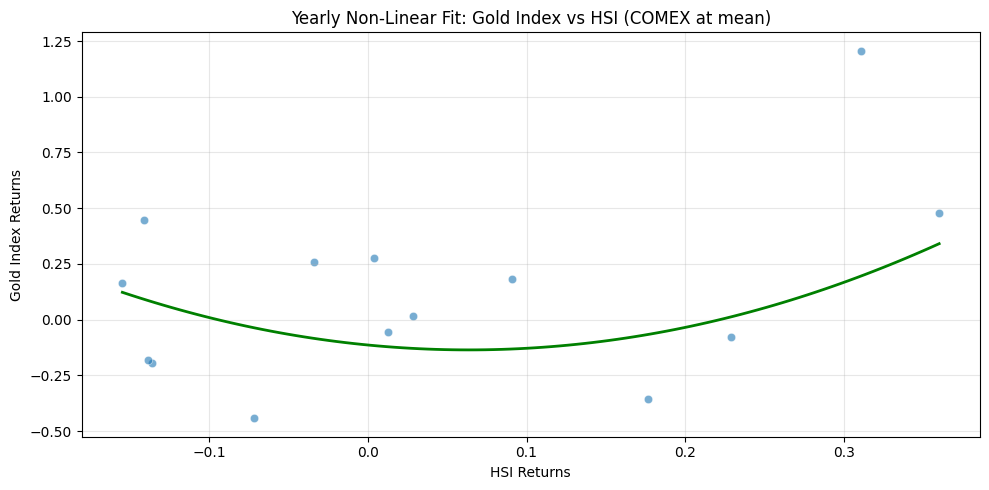

In [ ]:
# Define a function for non-linear regression analysis
def nonlinear_regression_all_freq(data, frequencies=['Daily', 'Monthly', 'Quarterly', 'Yearly']):
    """Run non-linear regression with polynomial and interaction terms across multiple time frequencies."""

    # Mapping for frequency codes
    freq_map = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    results = {}
    # Iterate through each frequency
    for freq in frequencies:
        try:
            print(f"\n{'='*60}\n{freq} Non-Linear Regression Analysis\n{'='*60}")
            # Get closing prices for selected assets
            gold_idx = data['calculated_indices']['Gold_Jewelry_Index_China']['Close']
            comex = data['gold_prices']['COMEX_Gold_Futures']['Close']
            hsi = data['indices']['Hang_Seng_Index']['Close']
            # Calculate returns based on frequency and combine into a DataFrame
            if freq == 'Daily':
                returns = pd.DataFrame({
                    'Gold_Index': gold_idx.pct_change(),
                    'COMEX': comex.pct_change(),
                    'HSI': hsi.pct_change()
                }).dropna()
            else:
                fcode = freq_map[freq]
                returns = pd.DataFrame({
                    'Gold_Index': gold_idx.resample(fcode).last().pct_change(),
                    'COMEX': comex.resample(fcode).last().pct_change(),
                    'HSI': hsi.resample(fcode).last().pct_change()
                }).dropna()

            # Build regression matrix with non-linear terms (squared and interaction)
            X = returns[['COMEX', 'HSI']].copy()
            X['COMEX_sq'] = X['COMEX']**2
            X['HSI_sq'] = X['HSI']**2
            X['Interaction'] = X['COMEX'] * X['HSI']
            X = sm.add_constant(X) # Add a constant term
            y = returns['Gold_Index']

            # Fit non-linear OLS model
            model = sm.OLS(y, X).fit()
            results[freq] = model
            print(model.summary())

            # ==================== F-TEST: LINEAR VS NON-LINEAR ====================
            print(f"\n{'='*60}\n{freq} F-Test: Linear vs Non-Linear Models\n{'='*60}")

            # Fit linear model (only COMEX and HSI, no squared terms or interaction)
            X_linear = sm.add_constant(returns[['COMEX', 'HSI']])
            model_linear = sm.OLS(y, X_linear).fit()

            # Calculate F-statistic to compare linear and non-linear models
            from scipy import stats
            SSR_linear = np.sum(model_linear.resid**2)
            SSR_nonlinear = np.sum(model.resid**2)
            p_nonlinear = 3  # 3 non-linear terms added (COMEX_sq, HSI_sq, Interaction)
            n = len(y)
            k_linear = 2  # 2 parameters in linear model (before constant)

            F_stat = ((SSR_linear - SSR_nonlinear) / p_nonlinear) / (SSR_nonlinear / (n - k_linear - 1 - p_nonlinear))
            p_value = 1 - stats.f.cdf(F_stat, p_nonlinear, n - k_linear - 1 - p_nonlinear)

            # Print R-squared values for both models
            print(f"\nLinear Model (COMEX + HSI only):")
            print(f"  R²: {model_linear.rsquared:.4f}")
            print(f"  Adj R²: {model_linear.rsquared_adj:.4f}")

            print(f"\nNon-Linear Model (COMEX + HSI + squared + interaction):")
            print(f"  R²: {model.rsquared:.4f}")
            print(f"  Adj R²: {model.rsquared_adj:.4f}")

            # Print F-test results
            print(f"\nF-Test Results:")
            print(f"  F-Statistic: {F_stat:.4f}")
            print(f"  P-value: {p_value:.4f}")
            print(f"  Observations (n): {n}")
            print(f"  Non-linear parameters added (p): {p_nonlinear}")
            print(f"  ΔR²: {model.rsquared - model_linear.rsquared:.4f}")

            # Interpret F-test results
            if p_value < 0.05:
                print(f"  ✓ RESULT: Non-linear model is SIGNIFICANTLY BETTER (p < 0.05)")
            else:
                print(f"  ✗ RESULT: Linear model is SUFFICIENT (p ≥ 0.05, no improvement from non-linear terms)")
            # ==================== END F-TEST ====================

            # Plot: Actual vs fitted Gold Index Returns
            plt.figure(figsize=(10, 5))
            plt.scatter(model.fittedvalues, y, alpha=0.6, s=25)
            lim = [min(model.fittedvalues.min(), y.min()), max(model.fittedvalues.max(), y.max())]
            plt.plot(lim, lim, 'r--', lw=2)
            plt.xlabel('Fitted Gold Index Returns'), plt.ylabel('Actual Gold Index Returns')
            plt.title(f'{freq} Non-Linear Regression: Actual vs Fitted'), plt.grid(True, alpha=0.3)
            plt.tight_layout(), plt.show()

            # Plot non-linear fit vs. COMEX (HSI fixed at mean)
            x_comex_range = np.linspace(X['COMEX'].min(), X['COMEX'].max(), 100)
            hsi_mean = X['HSI'].mean()
            pred_comex = pd.DataFrame({
                'const': 1,
                'COMEX': x_comex_range,
                'HSI': hsi_mean,
                'COMEX_sq': x_comex_range**2,
                'HSI_sq': hsi_mean**2,
                'Interaction': x_comex_range*hsi_mean
            })
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=returns['COMEX'], y=y, alpha=0.6)
            plt.plot(x_comex_range, model.predict(pred_comex), color='r', lw=2)
            plt.title(f'{freq} Non-Linear Fit: Gold Index vs COMEX (HSI at mean)'), plt.xlabel('COMEX Returns'), plt.ylabel('Gold Index Returns')
            plt.grid(True, alpha=0.3), plt.tight_layout(), plt.show()

            # Plot non-linear fit vs. HSI (COMEX fixed at mean)
            x_hsi_range = np.linspace(X['HSI'].min(), X['HSI'].max(), 100)
            comex_mean = X['COMEX'].mean()
            pred_hsi = pd.DataFrame({
                'const': 1,
                'COMEX': comex_mean,
                'HSI': x_hsi_range,
                'COMEX_sq': comex_mean**2,
                'HSI_sq': x_hsi_range**2,
                'Interaction': comex_mean*x_hsi_range
            })
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=returns['HSI'], y=y, alpha=0.6)
            plt.plot(x_hsi_range, model.predict(pred_hsi), color='g', lw=2)
            plt.title(f'{freq} Non-Linear Fit: Gold Index vs HSI (COMEX at mean)'), plt.xlabel('HSI Returns'), plt.ylabel('Gold Index Returns')
            plt.grid(True, alpha=0.3), plt.tight_layout(), plt.show()

        except Exception as e:
            # Handle errors during non-linear regression or plotting
            print(f"Error in {freq}: {e}")
    return results


# Usage: run non-linear regression analysis
nonlinear_results = nonlinear_regression_all_freq(research_data)

### Finish